# BUS 32100 Midterm 

Rules for the midterm: 
* No discussion or collaboration with other students, please
* TAs will institute a waiting room for office hours so they can speak to only one student at a time
* You may Slack questions to the TAs or instructor at any time

## Instructions

This is an **open-ended** data analytics exercise! You must first choose one of the following datasets (listed in order of perceived difficulty). All datasets are on Canvas, the links below are just if you'd like more information. You can use either regression or classification for most of them (even if the link says it's for classification, you may be able to use a different column to do a regression; be creative!): 

1. [Red wine quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) OR
2. [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) OR
3. [Cancer incidence](https://data.world/nrippner/ols-regression-challenge#) OR
4. [Simulated electrical grid stability](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) OR
5. [A synthetic (fake) dataset from a Human Resources department](https://www.kaggle.com/rhuebner/human-resources-data-set)

Some notes about them to help you decide: 
* You can do regression and classification with most of them, but one approach may be easier for each dataset
* The electrical grid stability dataset has features that are harder to interpret and you may not know what each one _really_ is; on the one hand, it may make the exercise harder, on the other hand, the exercise will be harder ;)
* The HR dataset has a lot of categorical variables
* Using the "hardest" dataset will not automatically get you a higher grade; a high quality analysis using red wine quality is better than a mediocre analysis of the HR dataset

## Required output

Once you choose a dataset, all that we're asking is that you do at least these five things: 

1. Do some preliminary EDA to understand your data and **write a few sentences** about what you see (hint: `describe`, `columns`, `info`, `value_counts`). You can do a train/test split, but it's not required
2. Feature engineer at least one new variable/column using the data -- be creative! This new feature does not have to be used in the model, but it should be somehow useful. Can you report a metric from it? And/or use it in the model.
3. Create one table with some type of summary statistic (hint: `groupby`?)
4. One chart or graph of any kind (hint: plot directly in `Pandas` with, e.g., `.plot` or use `Seaborn`, where we've seen heatmaps and pair plots). This can be a bar chart, a heatmap, a line chart, anything you can think of!)
5. Run one model: it can be regression or classification, up to you! If you do both, you'll impress us. For the model, outputting the coefficients alone is sufficient, but think about what else you can do (hint: performance metrics? R-squared and RMSE, e.g.). You can do a train/test split, but it's not required

## 0. Import the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df4 = pd.read_csv('diabetes.csv')

In [3]:
df4.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It seems that the first 9 columns are independent variables, while the last one is the dependent variable of this data

## 1. Preliminary EDA

Remember, you can do a train/test split, but it's not required.

In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I noticed that the 25th percentile has a limit of 24 in terms of age, while the 75th percentile has a limit of 41 years. Therefore any number that is less than 24 and more than 41 is considered an outlier, in the following cells I use mask to remove these outliers 

In [6]:
mask = (df4.Age >= 24) & (df4.Age <= 41)

In [7]:
mask

0      False
1       True
2       True
3      False
4       True
       ...  
763    False
764     True
765     True
766    False
767    False
Name: Age, Length: 768, dtype: bool

In [8]:
df4 = df4[mask]

In [9]:
df4['Diabatic or not'] = df4['Outcome'].apply(lambda x: 'Yes' if x else 'No')
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabatic or not
1,1,85,66,29,0,26.6,0.351,31,0,No
2,8,183,64,0,0,23.3,0.672,32,1,Yes
4,0,137,40,35,168,43.1,2.288,33,1,Yes
5,5,116,74,0,0,25.6,0.201,30,0,No
6,3,78,50,32,88,31.0,0.248,26,1,Yes


I added a new column and called it "Diabatic or not" that is equivalent to the "Outcome" column but holds yes/no instead of 1/0  

In [10]:
df4['Diabatic or not'].value_counts()

No     267
Yes    156
Name: Diabatic or not, dtype: int64

In [10]:
df4['Outcome'].value_counts()

0    267
1    156
Name: Outcome, dtype: int64

I wanted to make sure that the count of yes(s) and no(s) are the same as zero(s) and one(s) 

In [12]:
df4 = df4[df4['BloodPressure'] != 0 ]

I noticed in the data that there are rows that have zeros in the blood pressure, since it is not logical to have no blood pressure, I removed these rows

## 2. One table of summary statistics

In [13]:
df4.groupby('Pregnancies').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,126.851064,77.148936,28.148936,94.000000,38.348936,0.582426,27.808511,0.446809
1,116.140625,69.250000,26.468750,94.312500,32.782812,0.532750,28.328125,0.265625
2,113.100000,67.540000,26.460000,109.440000,32.694000,0.540100,26.660000,0.200000
3,126.754717,68.754717,22.886792,102.490566,31.220755,0.446283,29.018868,0.396226
4,124.632653,72.714286,16.795918,75.510204,32.553061,0.423939,30.510204,0.244898
5,113.256410,74.333333,20.025641,62.230769,33.707692,0.386410,31.846154,0.384615
6,112.464286,71.714286,22.107143,62.321429,31.100000,0.476036,32.428571,0.285714
7,138.791667,73.833333,20.666667,79.708333,33.825000,0.488333,36.916667,0.625000
8,136.923077,73.846154,19.769231,61.769231,31.507692,0.591923,36.538462,0.692308


I used groupby to extract the mean of each column according to the column "Pregnancies"

In [12]:
df4_grouped = df4.groupby(['Age', 'Diabatic or not']).size().value_counts
pd.set_option('display.max_rows', None) #used this to be able to see all the outcomes
df4_grouped

<bound method IndexOpsMixin.value_counts of Age  Diabatic or not
24   No                 38
     Yes                 8
25   No                 34
     Yes                14
26   No                 25
     Yes                 8
27   No                 24
     Yes                 8
28   No                 25
     Yes                10
29   No                 16
     Yes                13
30   No                 15
     Yes                 6
31   No                 11
     Yes                13
32   No                  7
     Yes                 9
33   No                  7
     Yes                10
34   No                 10
     Yes                 4
35   No                  5
     Yes                 5
36   No                  6
     Yes                10
37   No                 13
     Yes                 6
38   No                  6
     Yes                10
39   No                  9
     Yes                 3
40   No                  7
     Yes                 6
41   No          

I used groupby to see how many people have diabatic according to each age, younger females tend to have a wider gap between the yes(s) and no(s)

## 3. One chart or graph

In [13]:
first_plot_df4 = df4.groupby('BloodPressure')['Diabatic or not'].count()

In [14]:
first_plot_df4.shape

(39,)

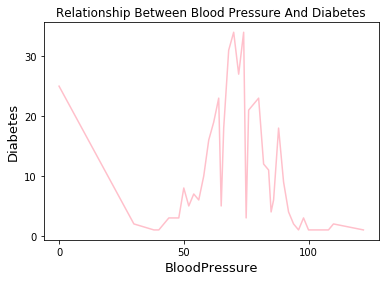

In [15]:
plt.xlabel('Blood Pressure', fontsize = 13,color='black');
plt.ylabel('Diabetes',fontsize = 13 ,color='black');
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
first_plot_df4.plot.line( x = 'Diabatic or not' , y= 'BloodPressure' , title = 'Relationship Between Blood Pressure And Diabetes',color='pink');

Having diabetes is more frequent in females who have a blood pressure from 55 till 75

In [16]:
second_plot_df4 = df4.groupby('Pregnancies')['Diabatic or not'].count()

In [17]:
second_plot_df4.shape

(15,)

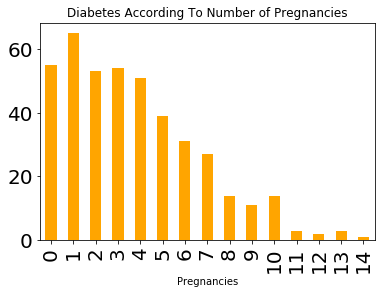

In [18]:
second_plot_df4.plot.bar( x = 'Diabatic or not' , y= 'Pregnancies', title = 'Diabetes According To Number of Pregnancies', color = 'orange')

the more times a woman gets pregnant, the less likely she will get diabetes

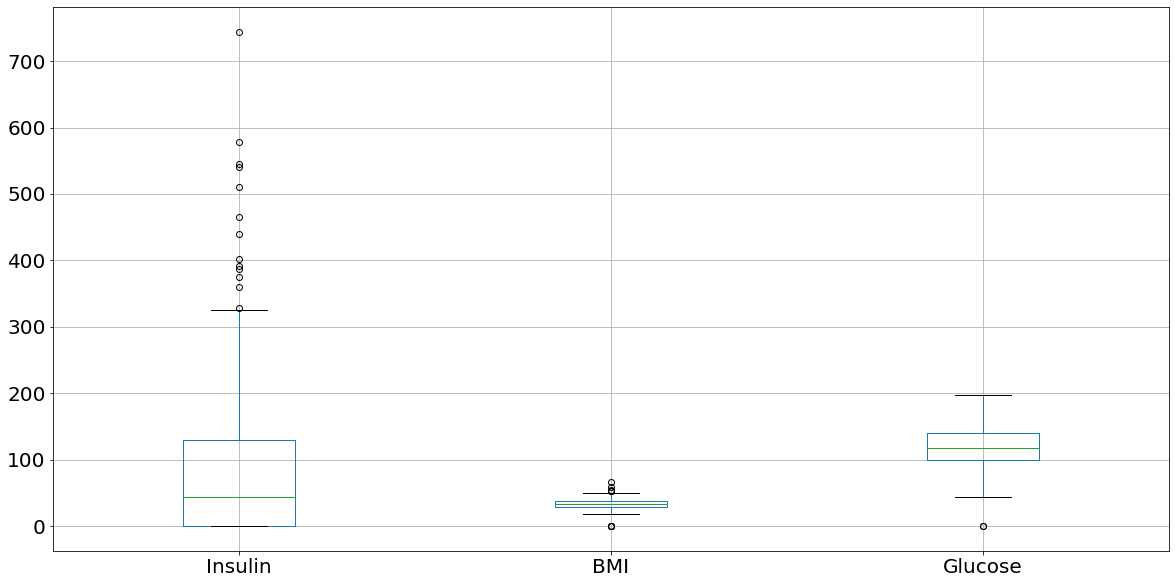

In [26]:
plt.figure(figsize = [20,10])
new_box = df4.boxplot(column= ['Insulin', 'BMI','Glucose'])

there are a lot of extreme outliers in the insulin, doing more stats to find out how to remove them

In [27]:
df4.Insulin.describe()

count    423.000000
mean      79.352246
std      107.859006
min        0.000000
25%        0.000000
50%       44.000000
75%      130.000000
max      744.000000
Name: Insulin, dtype: float64

In [28]:
mask = (df4.Insulin <= 300)

In [29]:
df4 = df4[mask]

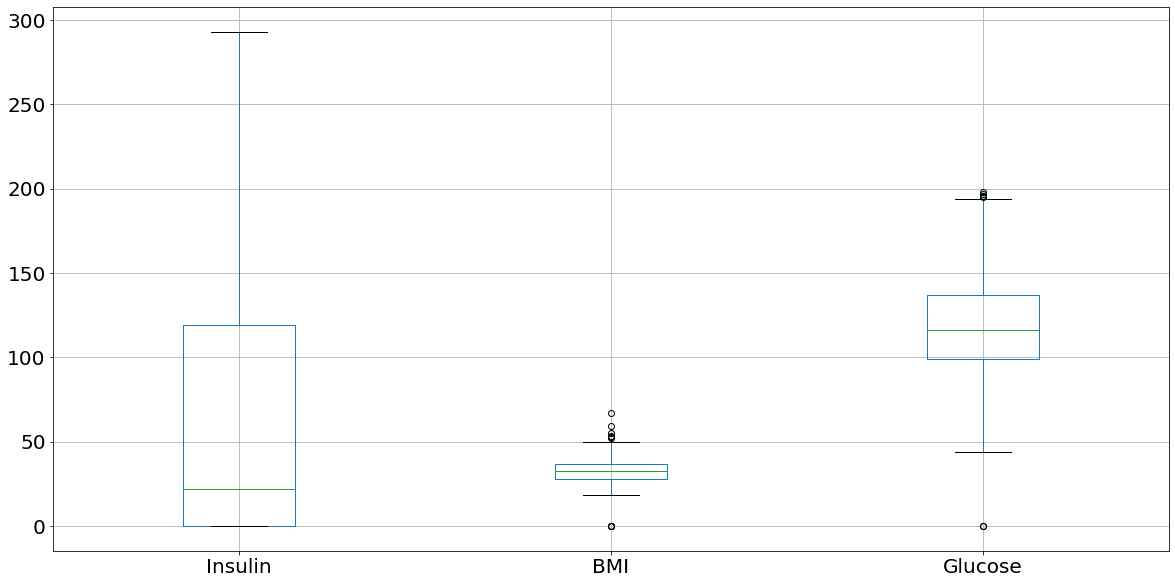

In [30]:
plt.figure(figsize = [20,10])
new_box = df4.boxplot(column= ['Insulin', 'BMI','Glucose'])

## 4. Run one model

The only requirement is that you use `sklearn` to run either a regression or classification (logistic regression) model. The only required output are the coefficients, but if you output some metrics, that's even better. 

In [31]:
X = df4.drop([ "Diabatic or not", "Outcome"], axis = 1)
y = df4.loc[:,"Outcome"]

In [32]:
df4_reg_model = LinearRegression()
df4_reg_model.fit(X, y)
R_squared_value = df4_reg_model.score(X, y)

In [33]:
df4_reg_model.coef_

array([ 8.66534911e-03,  6.00721953e-03, -3.26417608e-03, -5.74581657e-04,
       -2.01962021e-04,  1.48128182e-02,  2.13416020e-01,  1.11927416e-02])

the coefficients differ in their sign values, the negative ones represent (by default) a neagtive relationship, while the positive ones, represnt a positive relationship. However, this only represents the relationship between a single column and the y variable. We need to test the relationship of the whole model itself. 

In [34]:
R_squared_value

0.308505665116803

there is no to little correlation between x and y in this model

## 5. Feature engineering

Create at least one new column! Be creative. 

I moved this section because it depends on the above one

In [35]:
X2 = X.copy()

X2['Blood And Age'] = X2['BloodPressure'] * X2['Age']
X2['Sugar'] = X2['Glucose'] * X2['Insulin']
df4_reg_model = LinearRegression()
df4_reg_model.fit(X2, y)
R_squared_value = df4_reg_model.score(X2, y)

I calculated bloodpressure by age , and glucose by insluin: interaction terms

I used them to enhnace and increase the R squared as a metrics, in other words to try to make the two variables correlated 

In [36]:
R_squared_value

0.3153263899116918

the value changed to the better but with a very little amount 